<a href="https://colab.research.google.com/github/GLuarte/TareasX/blob/master/CERTAMEN_2_UDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [29]:
url1='https://raw.githubusercontent.com/GLuarte/TareasX/master/WHO-COVID-19-global-data.csv'
url2='https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto33/IndiceDeMovilidad-IM_externo.csv'
url3='https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto8/UCI_T.csv'
url4='https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv'
url5='https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto33/IndiceDeMovilidad-IM_interno.csv'
data_ww=pd.read_csv(url1)
data_ww=data_ww[['Date_reported','Country','New_cases','Cumulative_cases','New_deaths','Cumulative_deaths']]
i_movE=pd.read_csv(url2)
i_movI=pd.read_csv(url5)
uci_t=pd.read_csv(url3)
cases_CL=pd.read_csv(url4)


In [30]:
paises=[]

for i in data_ww['Country']:
  if i not in paises:
    paises.append(i)

In [31]:
regiones=[]
for i in cases_CL['Region']:
  if i not in regiones:
    regiones.append(i)

In [32]:
comunas=[]
for i in i_movE['Comuna']:
  if i not in comunas:
    comunas.append(i)

In [34]:
#Date formating
dates=[]
dates2=[]
for i in range(len(data_ww)):
  dates.append(data_ww['Date_reported'][i][0:10])
for i in dates:
  dates2.append(datetime.date(int(i[0:4]),int(i[5:7]),int(i[8:10])))
data_ww.pop('Date_reported')
data_ww.insert(0,'Date_reported',dates2)

In [35]:

## casos x pais
def casos_pais(dfile, country, fecha):
  C=country
  for i,j in enumerate(dfile['Country']):
    if j==C and dfile['Date_reported'][i]==fecha:
      result1=(C,fecha,dfile['Cumulative_cases'][i])

  
  return result1

In [36]:

##Ranking x pais
def n_casos_pais(n,fecha,dfile):
  ind=[]
  for i,j in enumerate(dfile['Date_reported']):
    if(j==fecha):
      ind.append(i)

  rank=pd.DataFrame(dfile.loc[ind])
  rank=rank.sort_values('Cumulative_cases',axis=0,ascending=False)
  indx=[]
  for i in range(1,n+1):
    indx.append(i)
  rank=pd.DataFrame(rank[:n])
  #rank=rank.reindex(indx)
  rank=rank.reset_index(drop=True)
  rank=rank[['Date_reported','Country','Cumulative_cases']]

 

  return (rank)

In [37]:
# Max Fallecidos

def max_fallecidos(dfile):
  deaths=pd.DataFrame(dfile.sort_values('Cumulative_deaths',ascending=False))
  deaths.reset_index(drop=True)
  deaths=deaths[:1]
  for i in (deaths.index):
    max_death=((deaths['Country'][i],deaths['Cumulative_deaths'][i]))
  
  return max_death

In [38]:


#COMPARA FALLECIDOS X PAIS
def compara_fallecidos_paises(pais1,pais2,fecha,dfile):

  ind=[]
  for i,j in enumerate(dfile['Date_reported']):
    if(j==fecha):
      ind.append(i)

  d1=pd.DataFrame(dfile.loc[ind])
  
  comp=[]
  for i in (d1.index):
    
    if(d1['Country'][i]==pais1 or d1['Country'][i]==pais2):
      comp.append(d1['Country'][i])
      comp.append(int(d1['Cumulative_deaths'][i]))
      comp.append(int(d1['New_deaths'][i]))
    
  if (comp[1]>comp[4]):
    x1=comp[0]
    y1=comp[1]
  elif(comp[1]<comp[4]):
    x1=comp[3]
    y1=comp[4]
  else:
    x1='La cantidad de fallecidos acumulados es la misma'
    y1=comp[1]  

  if (comp[2]>comp[5]):
    x2=comp[0]
    y2=comp[2]
  elif(comp[2]<comp[5]):
    x2=comp[3]
    y2=comp[5]
  else:
    x2='La cantidad de nuevos fallecidos es la misma'
    y2=comp[2] 

  result4=(x1,y1,x2,y2)
  return result4

In [39]:
def contagiados_region(dfile):
  dfile=dfile.copy()  
  columns=list(dfile)

  del columns[:5]
  columns.remove('Tasa')

  dfile["sum"] = dfile[columns].sum(axis=1)

  dfile=dfile[['Region','sum']]
  regiones=[]
  for i in dfile['Region']:
    if i not in regiones:
      regiones.append(i)

  casos=np.zeros(len(regiones))
  for i,j in enumerate (dfile['sum']):
    for k in range(len(regiones)):

      if (dfile['Region'][i]==regiones[k]):
        casos[k]+=j

  casos.astype(int)
  casosxregion = {regiones[i]: casos[i] for i in range(len(regiones))}
  return(casosxregion)

In [40]:
def contagiados_file_r(dfile,region):
  
  ind=[]
  for i,j in enumerate(dfile['Region']):
    if(j==region):
      ind.append(i)
  d1=pd.DataFrame(dfile.loc[ind])
  columns=list(dfile)
  #print(columns)
  del columns[:5]
  columns.remove('Tasa')
  #print(columns)

  
  d1["sum"] = d1[columns].sum(axis=1)
  
  d1=d1[['Comuna','sum']]
  #print(d1)
  
  comunas=[]
  for i in d1['Comuna']:
    if i not in comunas:
      comunas.append(i)
  
  
  casos=np.zeros(len(comunas))
  
  for i in (d1.index):
    for k in range(len(comunas)):

      if (d1['Comuna'][i]==comunas[k]):
        casos[k]+=d1['sum'][i]

  casos.astype(int)
  casosxcomuna = {comunas[i]: casos[i] for i in range(len(comunas))}
  dcasosxcomuna=pd.DataFrame.from_dict(casosxcomuna, orient='index',columns=['Casos'])
  region=region+'.csv'
  region=region.lower()
  region=region.replace(' ','_')
  dcasosxcomuna.to_csv(region,index=True)
  return(dcasosxcomuna)

In [41]:
def internados_uci_region(dfile):
  dfile=dfile.copy()  
  regiones=list(dfile)
  regiones.remove('Region')
  ucixregion={i: uci_t[i][len(dfile)-1] for i in(regiones)}
  return ucixregion

In [42]:

def porcentaje_poblacion(dfile,region):
  dfile=dfile.copy()

  dfile=dfile[['Region',region]]
  
  porc=np.zeros(len(dfile)-2)
  pob=dfile[region][1]
  dfile=dfile.drop([0,1],axis=0)
  dfile=dfile.rename(columns={'Region':'Fecha'})
  for i in range(2,len(dfile)):
    porc[i-2]=dfile[region][i]*100/pob
  
  dfile.insert(2,'% Poblacion en UCI',porc)
  
  name='UCI_'+region+'_evolucion.png'
  dfile.plot(x='Fecha',y='% Poblacion en UCI',kind='line',color='red')
  plt.xticks(np.arange(0,len(dfile)+1,10))
  plt.tick_params(axis='x',rotation=45)
  plt.title('Evolucion UCI '+region,loc='center')
  plt.savefig(name,quality=100,format='png')
  plt.show()
  return(dfile)


In [43]:

def mov_comunaE(dfile1,comuna,fecha):
  dfile1=dfile1.copy()
  for i,j in enumerate(dfile1['Comuna']):
    if (j==comuna):
      indx_movE=dfile1[str(fecha)][i]
  return indx_movE

In [44]:
def mov_comunaI(dfile2,comuna,fecha):
  dfile2=dfile2.copy()
  for i,j in enumerate(dfile2['Comuna']):
    if (j==comuna):
      indx_movI=dfile2[str(fecha)][i]
  return indx_movI

yes
         Fecha Indice externo
0   2020-02-26        4.34937
1   2020-02-27        4.36286
2   2020-02-28        4.68434
3   2020-02-29        4.01689
4   2020-03-01         3.0752
..         ...            ...
76  2020-05-13         2.7914
77  2020-05-14        2.79834
78  2020-05-15        2.93928
79  2020-05-16        2.34344
80  2020-05-17        1.76728

[81 rows x 2 columns]


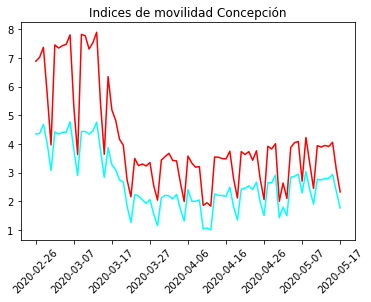

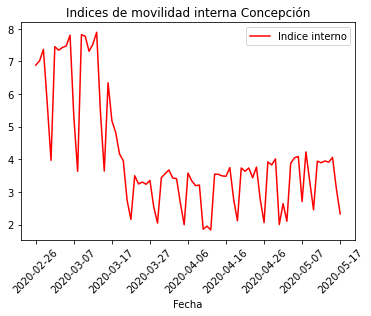

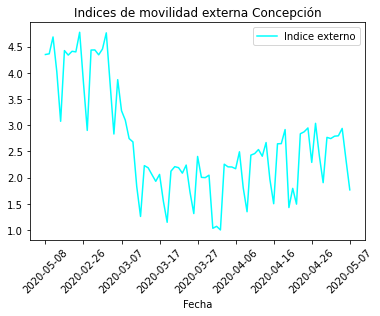

In [45]:
comuna='Concepción'
result10=movi_comuna_file(i_movE,i_movI,comuna)

In [46]:
print(comuna)
for i,j in enumerate(i_movE['Comuna']):
    if (j==comuna):
      print('yes')

Concepción
yes


In [53]:
def movi_comuna_file(dfile1,dfile2,comuna):
  dfile1=dfile1.copy()
  dfile2=dfile2.copy()
  dfile1=dfile1.drop(['Region','Codigo region','Codigo comuna','Superficie_km2','Poblacion'],axis=1)
  dfile2=dfile2.drop(['Region','Codigo region','Codigo comuna','Superficie_km2','Poblacion'],axis=1)
  
  for i,j in enumerate(dfile1['Comuna']):
    if (j==comuna):
      d1=dfile1.loc[[i]].copy()
      d2=dfile2.loc[[i]].copy()
     
  d1=d1.T
  #print(d1)
  d1=d1.drop(['Comuna'],axis=0)
  d1=d1.reset_index()
  d1=d1.rename(columns={'index':'Fecha',d1.columns[1]:'Indice externo'})
  d2=d2.T
  #print(d2)
  d2=d2.drop(['Comuna'],axis=0)
  d2=d2.reset_index()
  d2=d2.rename(columns={'index':'Fecha',d2.columns[1]:'Indice interno'})
  #print(d1)
  #print(d2)

  d2['Indice externo']=d1['Indice externo']
  plot_func(d2,comuna)

  comuna1='movilidad_'+comuna+'.csv'
  comuna1=comuna1.lower()
  comuna1=comuna1.replace(' ','_')
  d2.to_csv(comuna1,index=False)
  return d2

In [48]:
def plot_func(d2,comuna):
  plt.plot('Fecha','Indice interno',data=d2,marker='',color='red')
  plt.plot('Fecha','Indice externo',data=d2,marker='',color='cyan')
  plt.xticks(np.arange(0,len(d2)+1,10))
  plt.tick_params(axis='x',rotation=45)
  plt.title('Indices de movilidad '+comuna,loc='center')
  name2='Indices_movilidad_'+comuna+'_evolucion.png'
  plt.savefig(name2,quality=100,format='png')

  plt.show()

  d2.plot(x='Fecha',y='Indice interno',kind='line',color='red')
  plt.tick_params(axis='x',rotation=45)
  plt.title('Indices de movilidad interna '+comuna,loc='center')

  name1='Indice_movilidad_I_'+comuna+'_evolucion.png'
  plt.savefig(name1,quality=100,format='png')

  plt.show()
  d2.plot(x='Fecha',y='Indice externo',kind='line',color='cyan')
  plt.xticks(np.arange(0,len(d2)+1,10))
  plt.tick_params(axis='x',rotation=45)
  plt.title('Indices de movilidad externa '+comuna,loc='center')
  name2='Indice_movilidad_E_'+comuna+'_evolucion.png'
  plt.savefig(name2,quality=100,format='png')
  plt.show()

In [49]:
def date(fecha):
  fecha=datetime.date(int(fecha[0]),int(fecha[1]),int(fecha[2]))
  return fecha

In [50]:
def valida (variable,lista):
  variable=str(input())
  while variable not in lista:
    print(variable,'no existe, verifique mayusculas y/o tildes')
    variable=str(input('Ingrese nuevamente'))
  return variable

Seleccione una opcion:
(1)Casos por país
(2)Ranking por país
(3)Máximo de fallecidos
(4)Comparación de fallecidos
(5)Casos por región
(6)Casos por región y comuna
(7)Internados por región
(8)Evolución de paciente UCI en el tiempo
(9)Movilidad por comuna
(10)Cambio de movilidad
(0)Salir
10
Ingrese una comuna
Castro


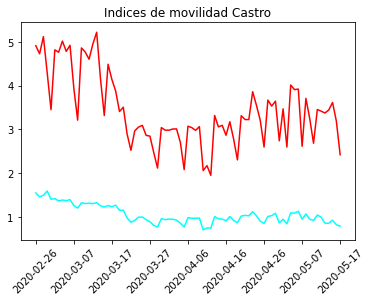

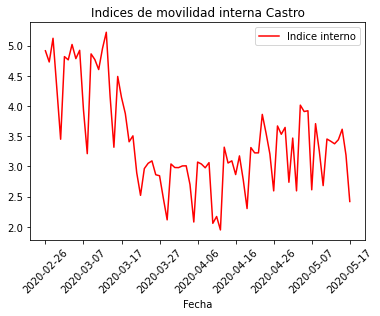

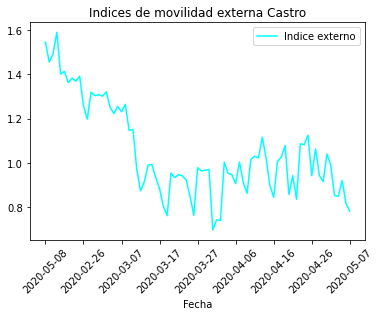

Para continuar seleccione una opción, en caso contrario escriba  0
0


In [54]:
country=''
region=''
comuna=''
print('Seleccione una opcion:\n(1)Casos por país\n(2)Ranking por país')
print('(3)Máximo de fallecidos\n(4)Comparación de fallecidos\n(5)Casos por región')
print('(6)Casos por región y comuna\n(7)Internados por región\n(8)Evolución de paciente UCI en el tiempo')
print('(9)Movilidad por comuna\n(10)Cambio de movilidad\n(0)Salir')
while True:
  
  
  opc=int(input())


  #1
  if opc==1:
    fecha=input('Ingrese fecha en formato AAAA MM DD (separado por espacio)').split()
    fecha=date(fecha)
    print('Ingrese un país a consultar')
    country=valida(country,paises)
    result1=casos_pais(data_ww,country,fecha)
    print('País:',result1[0],'Fecha:',result1[1],'Contagiados:',result1[2],'\n')

  #2
  elif opc==2:
    fecha=input('Ingrese fecha en formato AAAA MM DD (separado por espacio)').split()
    fecha=date(fecha)
    print('Ingrese cantidad de paises a consultar')
    n=int(input())
    result2=n_casos_pais(n,fecha,data_ww)
    print(result2,'\n')

  #3
  elif opc==3:
    result3=max_fallecidos(data_ww)
    print(result3,'\n')

  #4
  elif opc==4:
    fecha=input('Ingrese fecha en formato AAAA MM DD (separado por espacio)').split()
    fecha=date(fecha)
    print('Ingrese un país a consultar')
    pais1=valida(country,paises)
    print('Ingrese otro país a consultar')
    pais2=valida(country,paises)
    result4=compara_fallecidos_paises(pais1,pais2,fecha,data_ww)
    print(result4,'\n')

  #5
  elif opc==5:      
    result5=contagiados_region(cases_CL)
    print(result5,'\n')

  #6
  elif opc==6:  
    print('Ingrese una region')
    region=valida(region,regiones)
    result6=contagiados_file_r(cases_CL,region)
    print(result6,'\n')  

  #7
  elif opc==7:  
    result7=internados_uci_region(uci_t)
    print(result7,'\n')

  #8
  elif opc==8:
    print('Ingrese una region')
    region=valida(region,regiones)
    result8=porcentaje_poblacion(uci_t,region)
    #print(result8,'\n')

  #9
  elif opc==9:
    fecha=input('Ingrese fecha en formato AAAA MM DD (separado por espacio)').split()
    fecha=date(fecha)
    print('Ingrese una comuna')
    comunas=get_list('Comuna',i_movE)
    comuna=valida(comuna,comunas)
    result9_1=mov_comunaE(i_movE,comuna,fecha)
    result9_2=mov_comunaI(i_movI,comuna,fecha)
    print('Indice movilidad externa:\n',result9_1,'Indice de movilidad interna:',result9_2,'\n')

  #10
  elif opc==10:
    print('Ingrese una comuna')
    comuna=valida(comuna,comunas)
    result10=movi_comuna_file(i_movE,i_movI,comuna)
  elif opc==0:
    break
  print('Para continuar seleccione una opción, en caso contrario escriba ',0)

    